**LOADING DATASET, JOINING**

In [ ]:
import numpy as np
import pandas as pd

# Merge the two Data set together
df = pd.read_csv('dups.csv').merge(pd.read_csv('seq.csv'), how='inner', on='structureId')
# Drop rows with missing labels, getting the string values
df = df[[type(c) == type('string') for c in df.classification.values]]
df = df[[type(c) == type('string') for c in df.sequence.values]]
# select proteins
df_pro = df[df.macromoleculeType_x == 'Protein']
df_pro.reset_index()
df_pro.shape
df_pro.head(6)

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
15,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,332,Protein


**DATA VISUALIZATION AND PREPROCESSING**

at least 6972 instances per class
[46336, 36424, 34321, 15615, 11682, 11218, 8919, 8495, 8371, 6972]
['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM', 'LYASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'TRANSCRIPTION', 'VIRAL PROTEIN', 'TRANSPORT PROTEIN', 'VIRUS']


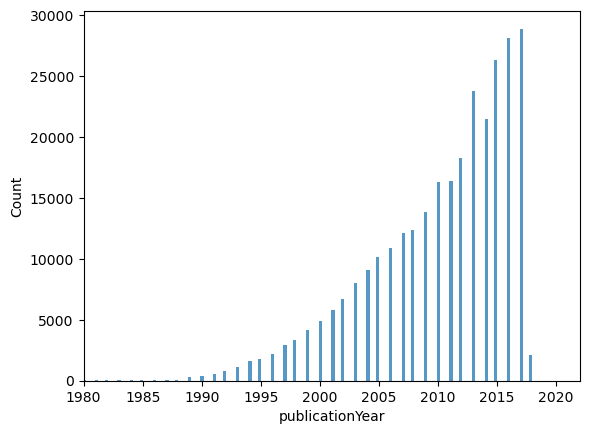

471117 instances before
188353 instances after


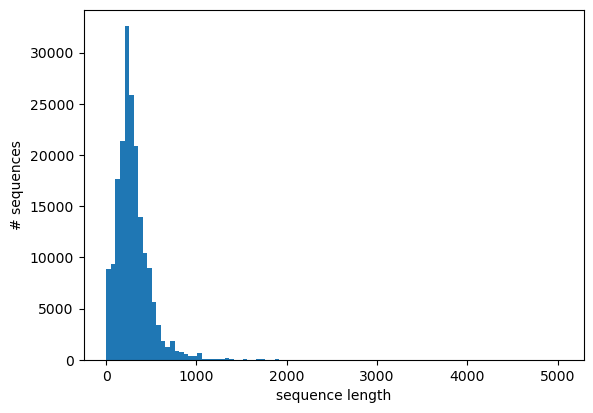

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
cnt = Counter(df_pro.classification)
top_class = 10

sorted_classes = cnt.most_common()[:top_class]

classes = [c[0] for c in sorted_classes]
counts = [c[1] for c in sorted_classes]
print("at least " + str(counts[-1]) + " instances per class")
print(counts)
print(classes)

#year of publication
fig,ax = plt.subplots()
sns.histplot(df_pro['publicationYear'],ax=ax)
ax.set_xlim(1980, 2022)
plt.show()
#sns.histplot()


# #applying to the data frame
print(str(df.shape[0]) + " instances before")
df_pro = df_pro[[c in classes for c in df_pro.classification]]
print(str(df_pro.shape[0]) + " instances after")

seqs = df_pro.sequence.values
lengths = [len(s) for s in seqs]
fig = plt.figure(figsize=(10,5))
axarr = fig.add_axes([10,-.5,0.5,0.7])
axarr.hist(lengths, bins=100)
axarr.set_xlabel('sequence length')
axarr.set_ylabel('# sequences')
plt.show()

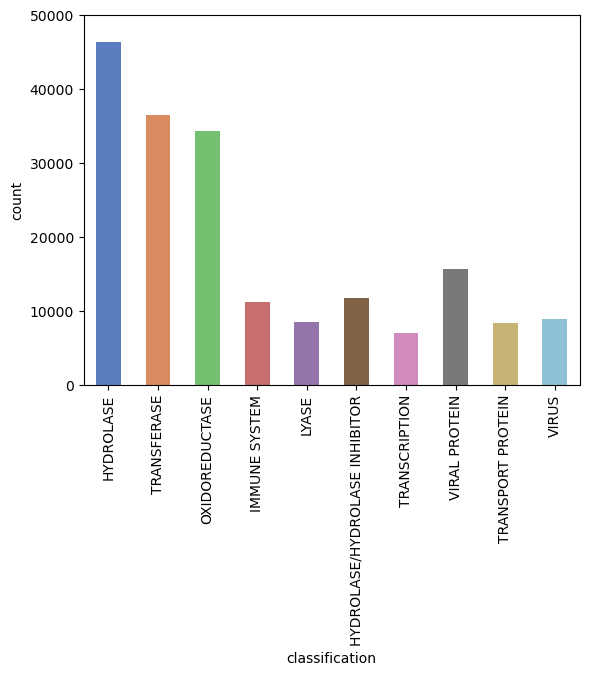

In [ ]:
#show the distribution of the type of protein and their numbers
fig,ax = plt.subplots()
sns.countplot(x='classification',data=df_pro,ax=ax,width=0.5,palette = 'muted')
plt.xticks(range(len(classes)), classes, rotation='vertical')
ax.set_ylim(0, 50000)

plt.show()

**Transform labels**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(df_pro.classification)
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#deeper model
#smaller sequence
#remove overfitting using dropout
from keras_preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
#print('1 here')
max_length = 250 
#print('2,here')
#create and fit tokenizer
tokenizer = Tokenizer(num_words = 21,char_level=True)
#print('3,here')
tokenizer.fit_on_texts(seqs)
#print('4, here')
# check = tokenizer.word_index
#print('5, here')
# #represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
# print('6, here')
# #print(X)
X = sequence.pad_sequences(X, maxlen=max_length)
# print('7, here')
X.shape
# print('8, here')
# max_rows = np.max(X,axis=1)
# #print(max_rows)
# print(check)

(188353, 250)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
#from tensorflow.keras.layers import Activation

In [ ]:
embedding_dim = 8
#best till now, kaernel size-2 is 3, activation function is tanh
# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='LeakyReLU'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='LeakyReLU'))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters = 64, kernel_size = 3, padding ='same',activation='LeakyReLU'))
model.add(MaxPooling1D(pool_size=3))
# model.add(Conv1D(filters = 16,kernel_size=2,padding='same',activation='relu' ))
model.add(Flatten())
model.add(Dense(128, activation='relu'))   #new add, changed the ReLu activation to tanh activation
# model.add(Dense(64, activation = 'LeakyReLU'))
model.add(Dropout(0.1))
model.add(Dense(top_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# x = tf.random.uniform(,256)
# model(x)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 8)            208       
                                                                 
 conv1d_3 (Conv1D)           (None, 250, 64)           2624      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 125, 64)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 125, 32)           6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 41, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 41, 64)           

In [ ]:
#shuffling the samples to remove any pattern
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

X,Y = shuffle(X,Y)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

hist = model.fit(X_train, y_train, validation_split = 0.1, epochs=20, batch_size=128)

Epoch 1/20
1060/1060 [==============================] - 22s 20ms/step - loss: 1.5042 - accuracy: 0.4585 - val_loss: 1.1018 - val_accuracy: 0.6305
Epoch 2/20
1060/1060 [==============================] - 22s 20ms/step - loss: 0.9395 - accuracy: 0.6882 - val_loss: 0.7561 - val_accuracy: 0.7562
Epoch 3/20
1060/1060 [==============================] - 22s 21ms/step - loss: 0.6789 - accuracy: 0.7798 - val_loss: 0.6039 - val_accuracy: 0.8096
Epoch 4/20
1060/1060 [==============================] - 22s 21ms/step - loss: 0.5479 - accuracy: 0.8233 - val_loss: 0.5253 - val_accuracy: 0.8404
Epoch 5/20
1060/1060 [==============================] - 22s 21ms/step - loss: 0.4660 - accuracy: 0.8488 - val_loss: 0.4969 - val_accuracy: 0.8541
Epoch 6/20
1060/1060 [==============================] - 22s 21ms/step - loss: 0.4130 - accuracy: 0.8658 - val_loss: 0.4413 - val_accuracy: 0.8750
Epoch 7/20
1060/1060 [==============================] - 23s 21ms/step - loss: 0.3723 - accuracy: 0.8774 - val_loss: 0.4237 -

1178/1178 [==============================] - 3s 2ms/step
train-acc = 0.9398202837764298
test-acc = 0.9049135940113084
train pred is [[9.69486218e-03 3.94950621e-05 1.79959014e-02 ... 8.67103875e-01
  4.17039059e-02 8.91720690e-03]
 [3.25428155e-05 3.44667273e-09 9.72900987e-01 ... 1.25000998e-03
  1.17128395e-04 2.56954525e-02]
 [1.19051227e-04 1.70933863e-08 1.06644714e-13 ... 6.40813141e-07
  3.01757859e-15 2.60854337e-12]
 ...
 [5.47688782e-01 3.94412829e-03 7.45060965e-02 ... 1.41359139e-02
  1.44864574e-01 1.39475480e-04]
 [9.15461196e-12 9.23711303e-13 1.18946135e-14 ... 2.88006508e-09
  3.85058298e-15 2.88031660e-21]
 [2.25624844e-01 7.74358273e-01 1.02471178e-08 ... 1.15942123e-06
  1.86600914e-07 2.26008883e-08]]


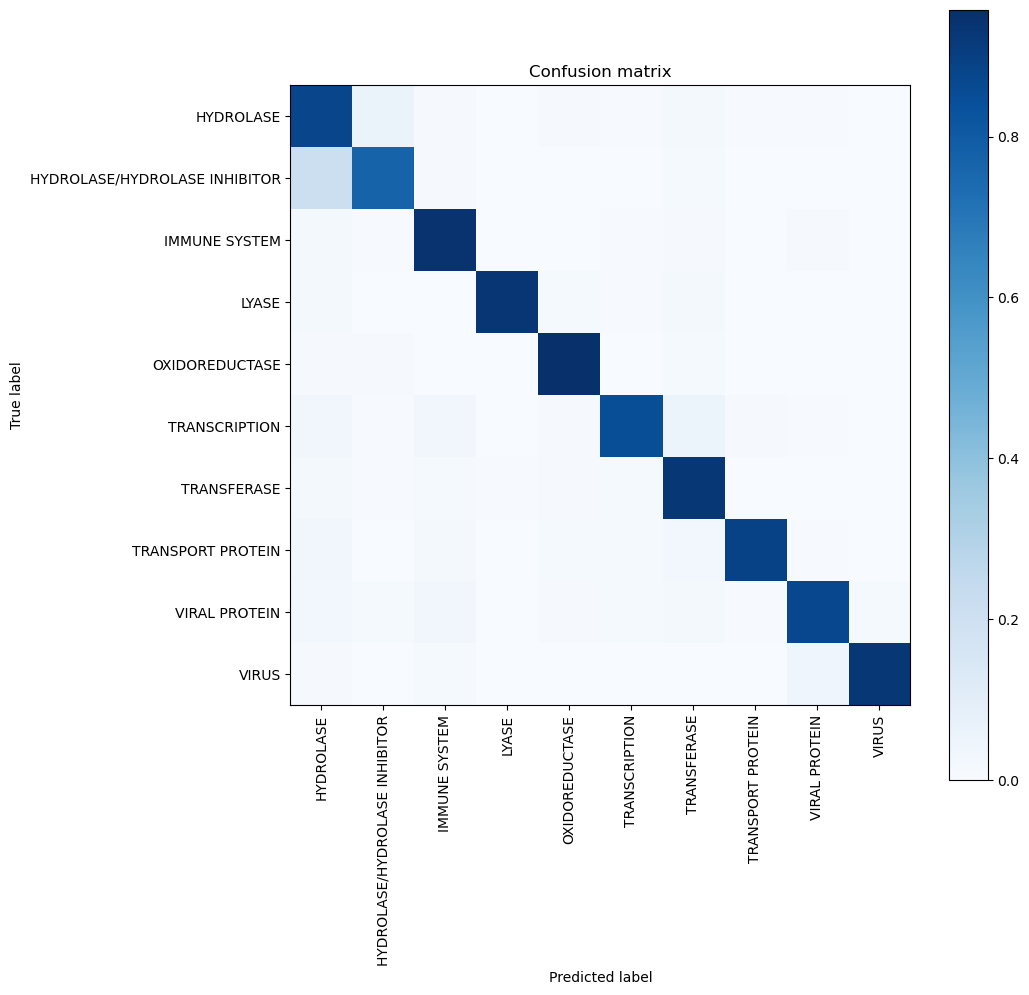

                               precision    recall  f1-score   support

                    HYDROLASE       0.89      0.88      0.89      9319
HYDROLASE/HYDROLASE INHIBITOR       0.70      0.77      0.73      2249
                IMMUNE SYSTEM       0.89      0.94      0.91      3146
                        LYASE       0.96      0.93      0.95      2323
               OXIDOREDUCTASE       0.96      0.96      0.96      6773
                TRANSCRIPTION       0.86      0.85      0.85      1752
                  TRANSFERASE       0.92      0.93      0.93      7276
            TRANSPORT PROTEIN       0.93      0.89      0.91      1661
                VIRAL PROTEIN       0.90      0.87      0.89      1763
                        VIRUS       0.97      0.93      0.95      1409

                     accuracy                           0.90     37671
                    macro avg       0.90      0.89      0.90     37671
                 weighted avg       0.91      0.90      0.91     37671



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from sklearn.metrcis import 
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))
print('train pred is',train_pred)
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

In [ ]:
def cohen_kappa_score(y1,y2, *, labels=None, weights=None, sample_weight=None):
    
    confusion = confusion_matrix(y1, y2, labels=labels, sample_weight=sample_weight)
    n_classes = confusion.shape[0]
    sum0 = np.sum(confusion, axis=0)
    sum1 = np.sum(confusion, axis=1)
    expected = np.outer(sum0, sum1) / np.sum(sum0)

    if weights is None:
        w_mat = np.ones([n_classes, n_classes], dtype=int)
        w_mat.flat[:: n_classes + 1] = 0
    elif weights == "linear" or weights == "quadratic":
        w_mat = np.zeros([n_classes, n_classes], dtype=int)
        w_mat += np.arange(n_classes)
        if weights == "linear":
            w_mat = np.abs(w_mat - w_mat.T)
        else:
            w_mat = (w_mat - w_mat.T) ** 2
    else:
        raise ValueError("Unknown kappa weighting type.")

    k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
    return 1 - k

trainpred = cohen_kappa_score(np.argmax(train_pred,axis=1),np.argmax(y_train,axis=1))
print('kohens cappa train pred',trainpred)
testpred = cohen_kappa_score(np.argmax(test_pred,axis=1),np.argmax(y_test,axis=1))
print('kohens cappa test pred',testpred)

kohens cappa train pred 0.929011969408336
kohens cappa test pred 0.8878287567774208


In [ ]:
#matthews correlation cofficient

from sklearn.metrics import matthews_corrcoef

train_p = matthews_corrcoef(np.argmax(y_train,axis=1), np.argmax(train_pred,axis=1))
print(train_p)

0.9290545602286161


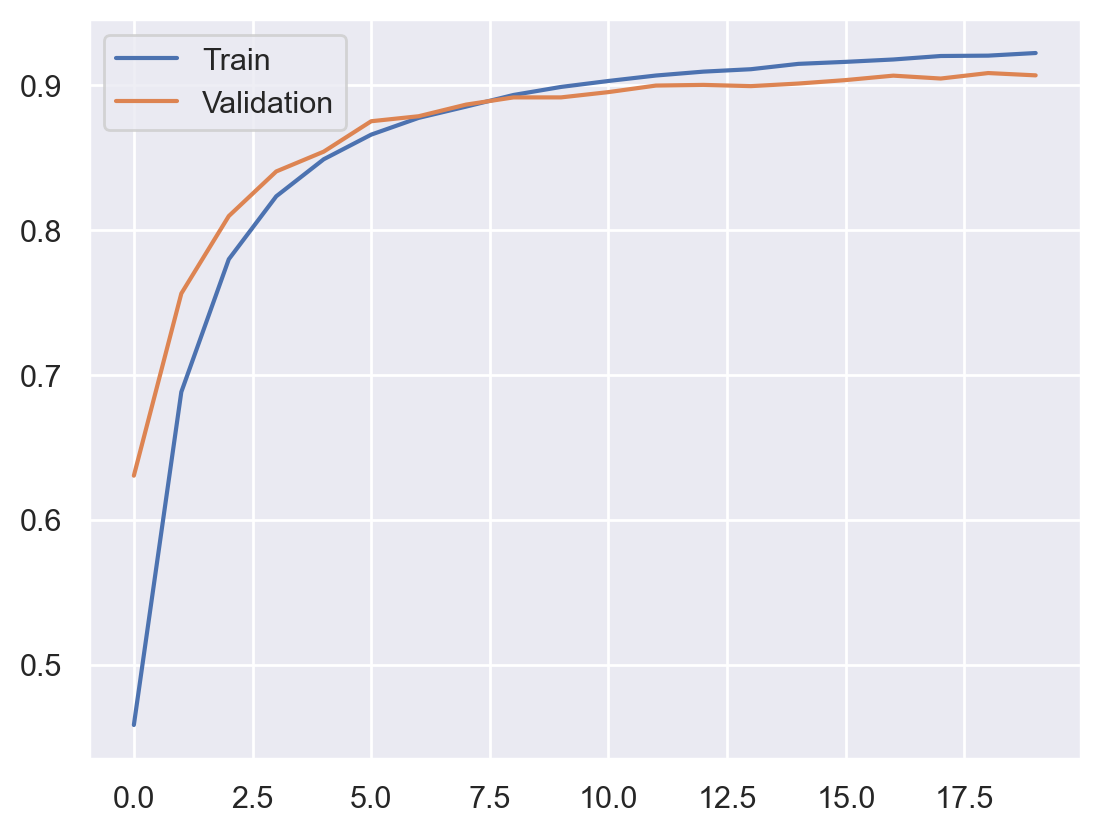

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.gcf().set_dpi(200)
plt.show()
plt.savefig('LossVal_loss_nonaugmented')

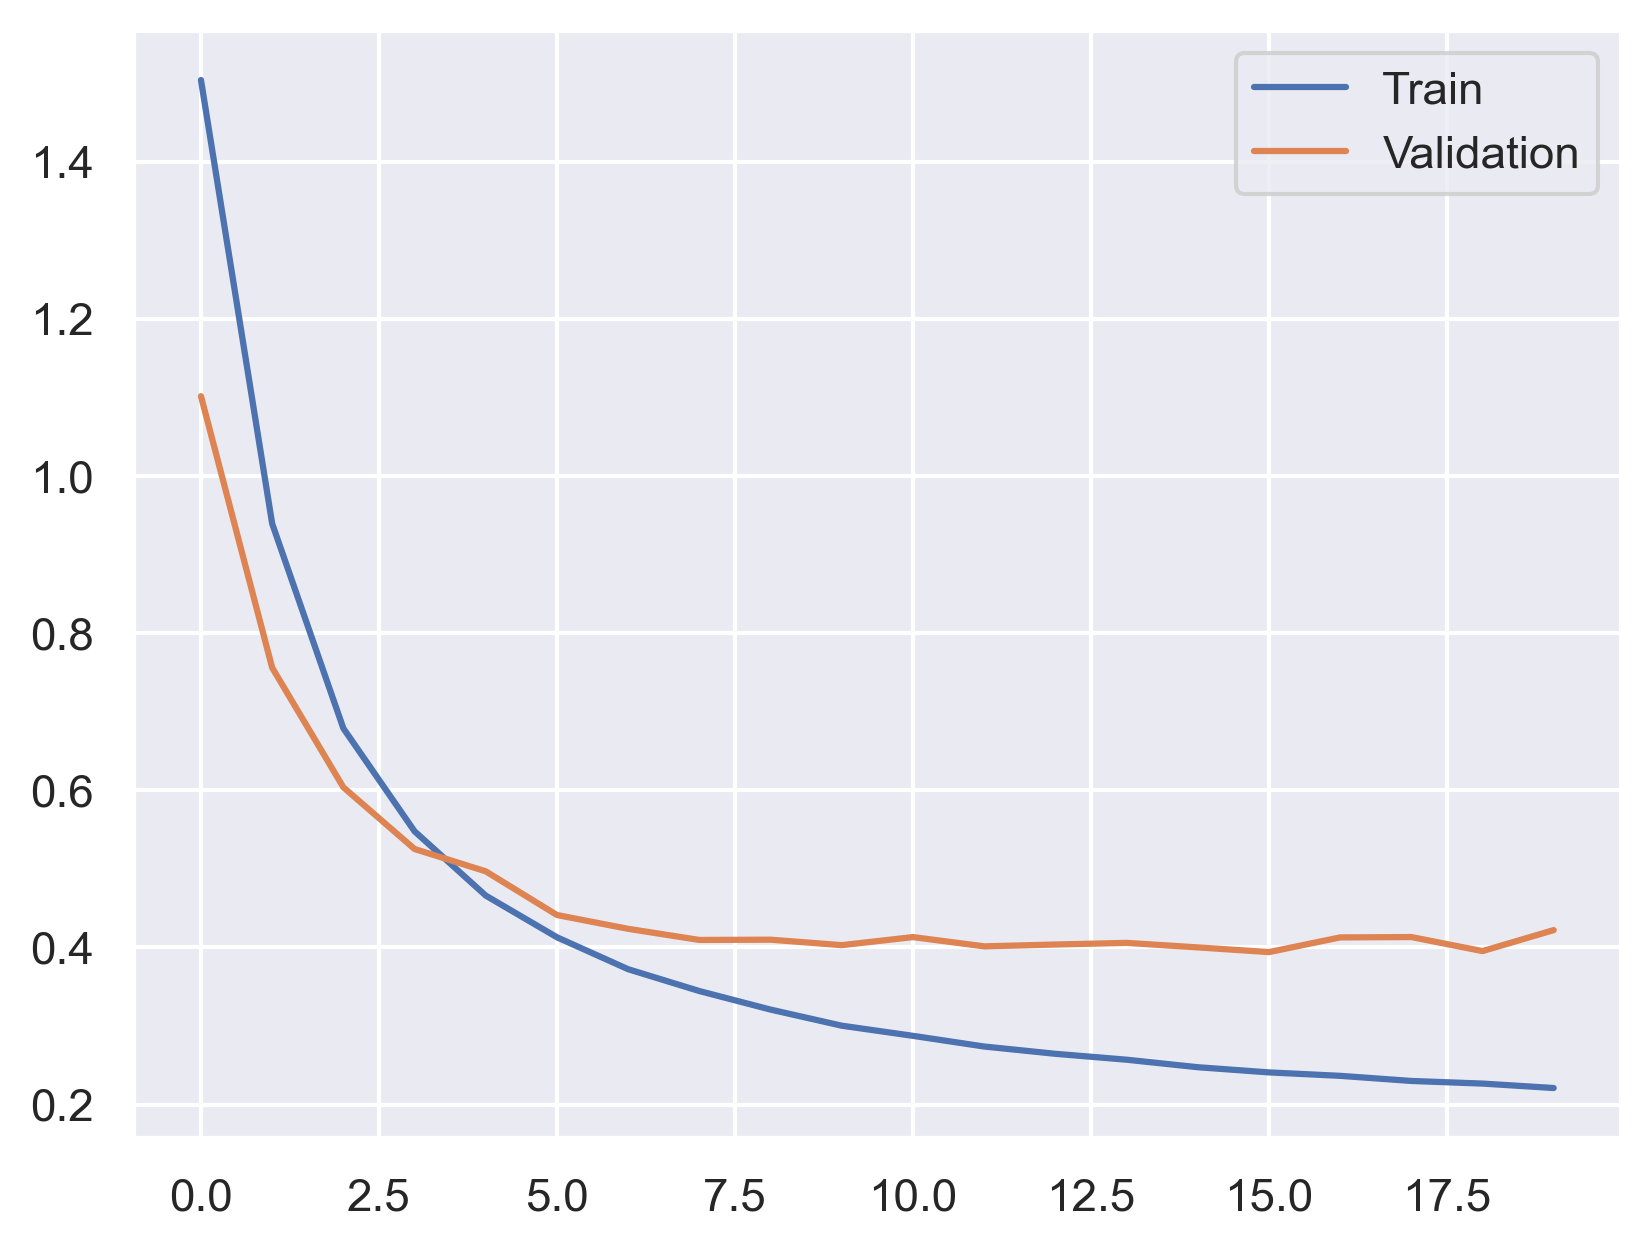

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Validation')
plt.legend()
plt.gcf().set_dpi(300)
plt.show()
plt.savefig('LossVal_loss_nonaugmented')